In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pymongo
from datetime import datetime, timedelta
import random
import os
import certifi
from collections import Counter
ca = certifi.where()
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
import seaborn as sns

In [2]:
uriMongodb = os.getenv('uriMongodb')
client = pymongo.MongoClient(uriMongodb, tlsCAFile=ca)
db = client['calaid_android']
activityDataCollection = db['ActivityData']
dtMongoStart = datetime.strptime("2023-05-21 01:41:30.733000", '%Y-%m-%d %H:%M:%S.%f') #+ timedelta(days=7)
week1End = dtMongoStart + timedelta(days=2)
week2End = week1End + timedelta(days=7)

In [3]:
week1 = list(activityDataCollection.find({ "userId": os.getenv('userId'), "startTimestamp":{"$gte": dtMongoStart, "$lte": week1End} }))
dfWeek1 = pd.DataFrame(week1)
dfWeek1.sort_values(by='startTimestamp', inplace=True)
# print((dfWeek1['startTimestamp'].dt.date))
print(dfWeek1)

                          _id          startTimestamp            endTimestamp   
2    6473cc1e091fed21f499cda4 2023-05-21 01:41:30.733 2023-05-21 01:46:30.733  \
7    6473cc1e091fed21f499cda5 2023-05-21 01:46:30.733 2023-05-21 01:51:30.733   
10   6473cc1e091fed21f499cda6 2023-05-21 01:51:30.733 2023-05-21 01:56:30.733   
4    6473cc1e091fed21f499cda7 2023-05-21 01:56:30.733 2023-05-21 02:01:30.733   
452  6473cc1e091fed21f499cda8 2023-05-21 02:01:30.733 2023-05-21 02:06:30.733   
..                        ...                     ...                     ...   
510  6473cc1e091fed21f499cfe0 2023-05-23 01:21:30.733 2023-05-23 01:26:30.733   
511  6473cc1e091fed21f499cfe1 2023-05-23 01:26:30.733 2023-05-23 01:31:30.733   
518  6473cc1e091fed21f499cfe2 2023-05-23 01:31:30.733 2023-05-23 01:36:30.733   
524  6473cc1e091fed21f499cfe3 2023-05-23 01:36:30.733 2023-05-23 01:41:30.733   
525  6473cc1e091fed21f499cfe4 2023-05-23 01:41:30.733 2023-05-23 01:46:30.733   

                       user

577


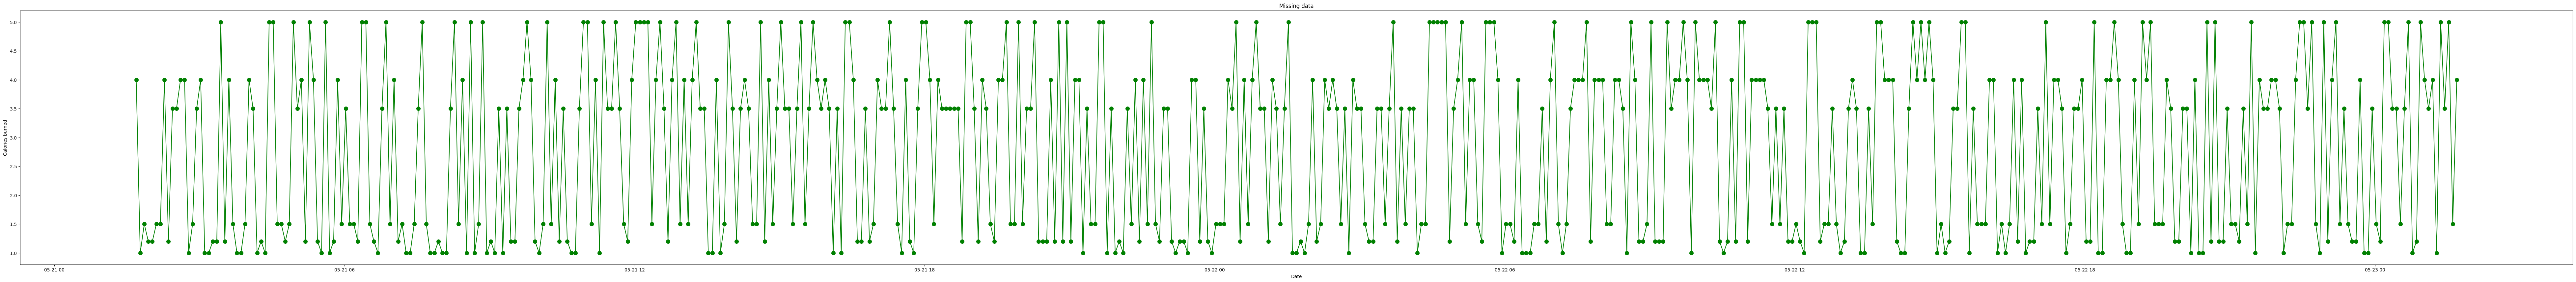

In [6]:
print(len(week1))

plt.figure(figsize=(100, 10))
plt.scatter(dfWeek1['startTimestamp'], dfWeek1['caloriesBurned'] , color='green', s=70)
plt.plot(dfWeek1['startTimestamp'], dfWeek1['caloriesBurned'], color='green')
plt.xlabel('Date')
plt.ylabel('Calories burned')
plt.title('Missing data')
plt.show()

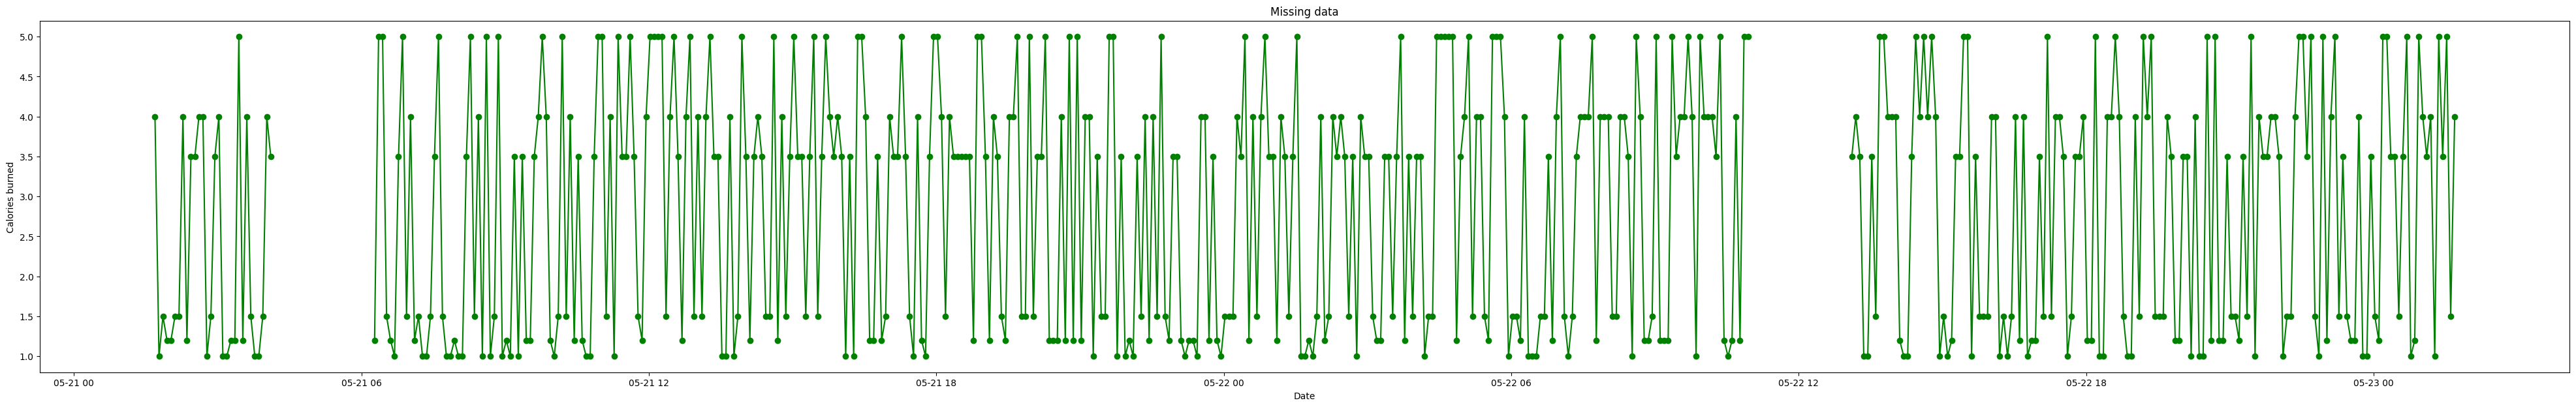

In [6]:
sorted_week1 = sorted(week1, key=lambda x: x['startTimestamp'])
for data in range(30,55):
    sorted_week1[data]['activityType'] = None
    sorted_week1[data]['caloriesBurned'] = None
for data in range(400,425):
    sorted_week1[data]['activityType'] = None
    sorted_week1[data]['caloriesBurned'] = None


# for data in range(720,744):
#     sorted_week1[data]['activityType'] = None
#     sorted_week1[data]['caloriesBurned'] = 0
dfWeek1_1 = pd.DataFrame(sorted_week1)
dfWeek1_1_null = dfWeek1_1.loc[dfWeek1_1.isnull().any(axis=1)]
plt.figure(figsize=(50, 7))
plt.scatter(dfWeek1_1['startTimestamp'], dfWeek1_1['caloriesBurned'] , color='green', marker='o')
plt.plot(dfWeek1_1['startTimestamp'], dfWeek1_1['caloriesBurned'], color='green')
plt.scatter(dfWeek1_1_null['startTimestamp'], dfWeek1_1_null['caloriesBurned'], color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Calories burned')
plt.title('Missing data')
plt.show()


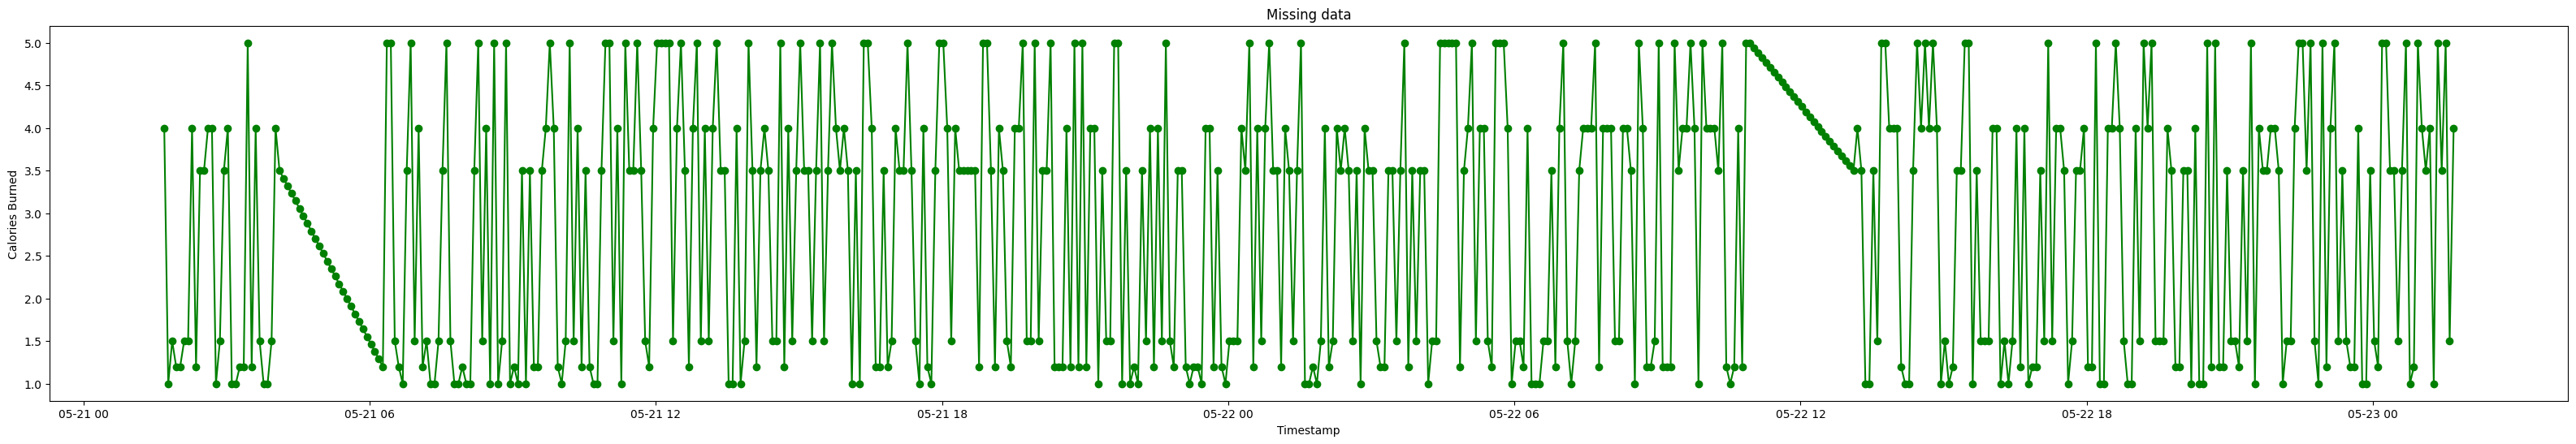

In [7]:
# dfWeek1_1['activityType'].interpolate(method='linear', inplace=True)
dfWeek1_1['caloriesBurned'].interpolate(method='linear', inplace=True)

# dfWeek1_1.reset_index(inplace=True)
plt.figure(figsize=(40, 6))
# plt.plot(df['startTimestamp'], df['caloriesBurned'])
plt.plot(dfWeek1_1['startTimestamp'],dfWeek1_1['caloriesBurned']  , color='green', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Calories Burned')
plt.title('Missing data')
plt.show()

In [9]:
#MISSING DATA RANGE
missingRange1 =dfWeek1_1.iloc[30:55]['caloriesBurned'].values
missingRange2 = dfWeek1_1.iloc[400:425]['caloriesBurned'].values
print((dfWeek1_1.iloc[30:55]['caloriesBurned'].values))
print((dfWeek1_1.iloc[400:425]['caloriesBurned'].values))

#ACTUAL DATA
realRange1 = dfWeek1.iloc[30:55]['caloriesBurned'].values
realRange2 = dfWeek1.iloc[400:425]['caloriesBurned'].values
print((dfWeek1.iloc[30:55]['caloriesBurned'].values))
print((dfWeek1.iloc[400:425]['caloriesBurned'].values))

corr_matrix = np.corrcoef(realRange1, missingRange1)
corr = corr_matrix[0,1]
R_sq = corr**2
diff = missingRange1 - realRange1
std_dev = np.std(diff)
msd = np.mean(std_dev)

print(msd)
print(R_sq)


[3.41153846 3.32307692 3.23461538 3.14615385 3.05769231 2.96923077
 2.88076923 2.79230769 2.70384615 2.61538462 2.52692308 2.43846154
 2.35       2.26153846 2.17307692 2.08461538 1.99615385 1.90769231
 1.81923077 1.73076923 1.64230769 1.55384615 1.46538462 1.37692308
 1.28846154]
[4.94230769 4.88461538 4.82692308 4.76923077 4.71153846 4.65384615
 4.59615385 4.53846154 4.48076923 4.42307692 4.36538462 4.30769231
 4.25       4.19230769 4.13461538 4.07692308 4.01923077 3.96153846
 3.90384615 3.84615385 3.78846154 3.73076923 3.67307692 3.61538462
 3.55769231]
[1.  1.2 1.  5.  5.  1.5 1.5 1.2 1.5 5.  3.5 4.  1.2 5.  4.  1.2 1.  5.
 1.  1.2 4.  1.5 3.5 1.5 1.5]
[1.2 4.  4.  4.  4.  3.5 1.5 3.5 1.5 3.5 1.2 1.2 1.5 1.2 1.  5.  5.  5.
 1.2 1.5 1.5 3.5 1.5 1.  1.2]
1.7103845721402497
8.83936366281876e-05


In [14]:
week1 = list(activityDataCollection.find({ "userId": os.getenv('userId'), "startTimestamp":{"$gte": dtMongoStart, "$lte": week1End} }))

dfWeek1 = pd.DataFrame(week1)
dfWeek1.sort_values(by='startTimestamp', inplace=True)
# print((dfWeek1['startTimestamp'].dt.date))

In [12]:
sorted_week1_2 = sorted(week1, key=lambda x: x['startTimestamp'])
random_indices = random.sample(range(0, 575+1), 116)
removed_values = dfWeek1.loc[random_indices, 'caloriesBurned'].copy()
dfWeek1.loc[random_indices, 'caloriesBurned'] = None  # Replace 'column_name' with the actual column name
dfWeek1['caloriesBurned'] = dfWeek1['caloriesBurned'].interpolate()

In [15]:
dfCopy = dfWeek1.copy()
sorted_week1_2 = sorted(week1, key=lambda x: x['startTimestamp'])

random_indices = random.sample(range(0, 575+1), 116)
realDF = dfWeek1.iloc[random_indices]

for index in random_indices:
    dictionary = sorted_week1_2[index]  # Access the dictionary at the random index
    dictionary['caloriesBurned'] = None
    dictionary['activityType'] = None  # Modify the value for the 'calories' key
    sorted_week1_2[index] = dictionary  # Replace the modified dictionary back into the list




In [16]:
# random_indices = random.sample(range(0, 575+1), 116)
# realDF = dfWeek1.iloc[random_indices]
# missingDF = dfWeek1.iloc[random_indices]
# missingDF['caloriesBurned'] = 0
# print(realDF)
comparison_df = dfWeek1.loc[random_indices]
print(comparison_df)
dfWeek1_2 = pd.DataFrame(sorted_week1_2)
dfWeek1_2_null = dfWeek1_2.loc[dfWeek1_2.isnull().any(axis=1)]




                          _id          startTimestamp            endTimestamp   
123  6473cc1e091fed21f499cf21 2023-05-22 09:26:30.733 2023-05-22 09:31:30.733  \
227  6473cc1e091fed21f499cf91 2023-05-22 18:46:30.733 2023-05-22 18:51:30.733   
283  6473cc1e091fed21f499ce8b 2023-05-21 20:56:30.733 2023-05-21 21:01:30.733   
196  6473cc1e091fed21f499cf70 2023-05-22 16:01:30.733 2023-05-22 16:06:30.733   
245  6473cc1e091fed21f499ce5d 2023-05-21 17:06:30.733 2023-05-21 17:11:30.733   
..                        ...                     ...                     ...   
11   6473cc1e091fed21f499cdbe 2023-05-21 03:51:30.733 2023-05-21 03:56:30.733   
341  6473cc1e091fed21f499cdfa 2023-05-21 08:51:30.733 2023-05-21 08:56:30.733   
447  6473cc1e091fed21f499cea3 2023-05-21 22:56:30.733 2023-05-21 23:01:30.733   
512  6473cc1e091fed21f499cfa0 2023-05-22 20:01:30.733 2023-05-22 20:06:30.733   
132  6473cc1e091fed21f499ce29 2023-05-21 12:46:30.733 2023-05-21 12:51:30.733   

                       user

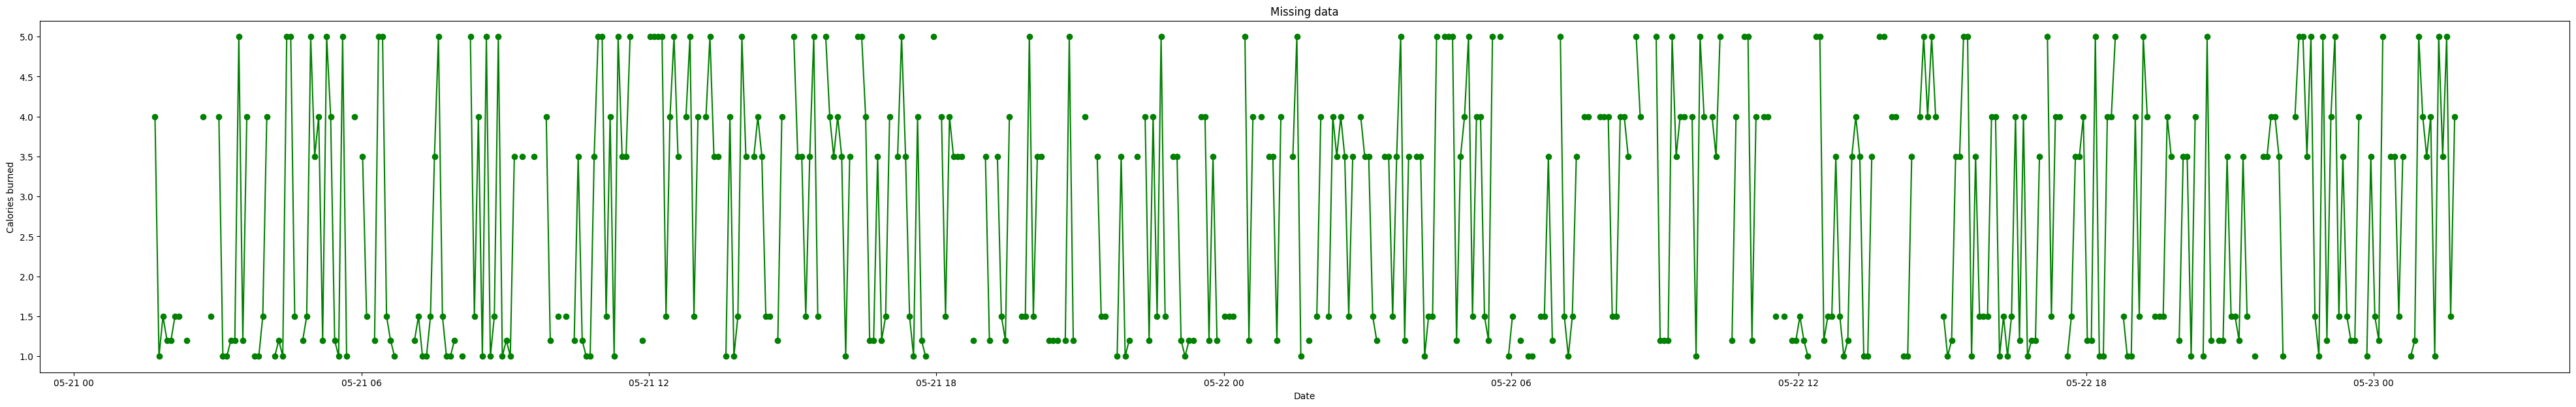

In [17]:
plt.figure(figsize=(50, 7))
plt.scatter(dfWeek1_2['startTimestamp'], dfWeek1_2['caloriesBurned'] , color='green', marker='o')
plt.plot(dfWeek1_2['startTimestamp'], dfWeek1_2['caloriesBurned'], color='green')
plt.scatter(dfWeek1_2_null['startTimestamp'], dfWeek1_2_null['caloriesBurned'], color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Calories burned')
plt.title('Missing data')
plt.show()





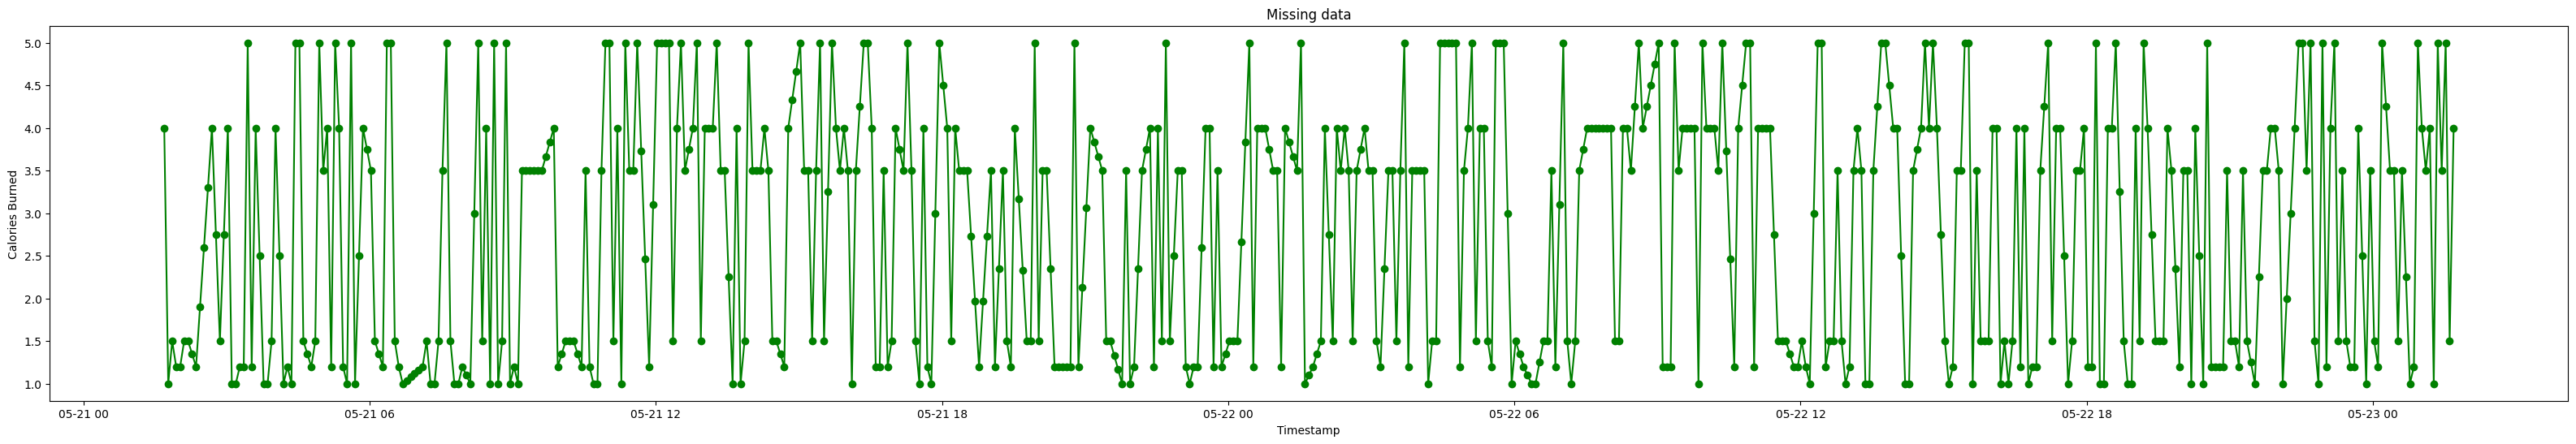

In [18]:
dfWeek1_2['caloriesBurned'].interpolate(method='linear', inplace=True)
dfInterpolated = dfWeek1_2
# dfWeek1_1.reset_index(inplace=True)
plt.figure(figsize=(40, 6))
# plt.plot(df['startTimestamp'], df['caloriesBurned'])
plt.plot(dfInterpolated['startTimestamp'],dfInterpolated['caloriesBurned'], color='green', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Calories Burned')
plt.title('Missing data')
plt.show()

In [21]:

realRange = dfWeek1['caloriesBurned'].values 
missingRange = dfWeek1_2['caloriesBurned'].values

diff = missingRange - realRange
std_dev = np.std(diff)
msd = np.mean(std_dev)

print(msd)
corr_matrix = np.corrcoef(realRange, missingRange)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.8806815461804308
0.678895398698041


In [14]:
week2 = list(activityDataCollection.find({ "userId": os.getenv('userId'), "startTimestamp":{"$gte": week1End, "$lte": week2End} }))
print(len(week2))
dfWeek2 = pd.DataFrame(week2)
dfWeek2.sort_values(by='startTimestamp', inplace=True)
#print(dfWeek2)
print(dfWeek2.loc[dfWeek2.isnull().any(axis=1)])

2024
                           _id          startTimestamp   
20    647523f834b17e0c7ccd093c 2023-05-28 02:51:30.733  \
290   647523f834b17e0c7ccd0948 2023-05-28 03:51:30.733   
291   647523f834b17e0c7ccd094b 2023-05-28 04:06:30.733   
476   647523f834b17e0c7ccd0950 2023-05-28 04:31:30.733   
446   647523f834b17e0c7ccd095a 2023-05-28 05:21:30.733   
...                        ...                     ...   
1793  647523f834b17e0c7ccd10f2 2023-06-03 23:21:30.733   
1954  647523f834b17e0c7ccd10fb 2023-06-04 00:06:30.733   
1886  647523f834b17e0c7ccd10fd 2023-06-04 00:16:30.733   
1574  647523f834b17e0c7ccd10fe 2023-06-04 00:21:30.733   
1826  647523f834b17e0c7ccd1107 2023-06-04 01:06:30.733   

                endTimestamp                    userId activityType   
20   2023-05-28 02:56:30.733  6414e7b4911b2b5943024071         None  \
290  2023-05-28 03:56:30.733  6414e7b4911b2b5943024071         None   
291  2023-05-28 04:11:30.733  6414e7b4911b2b5943024071         None   
476  2023-05-2

/tmp/ipykernel_5105/2218911828.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNullValues['caloriesBurned'] = None


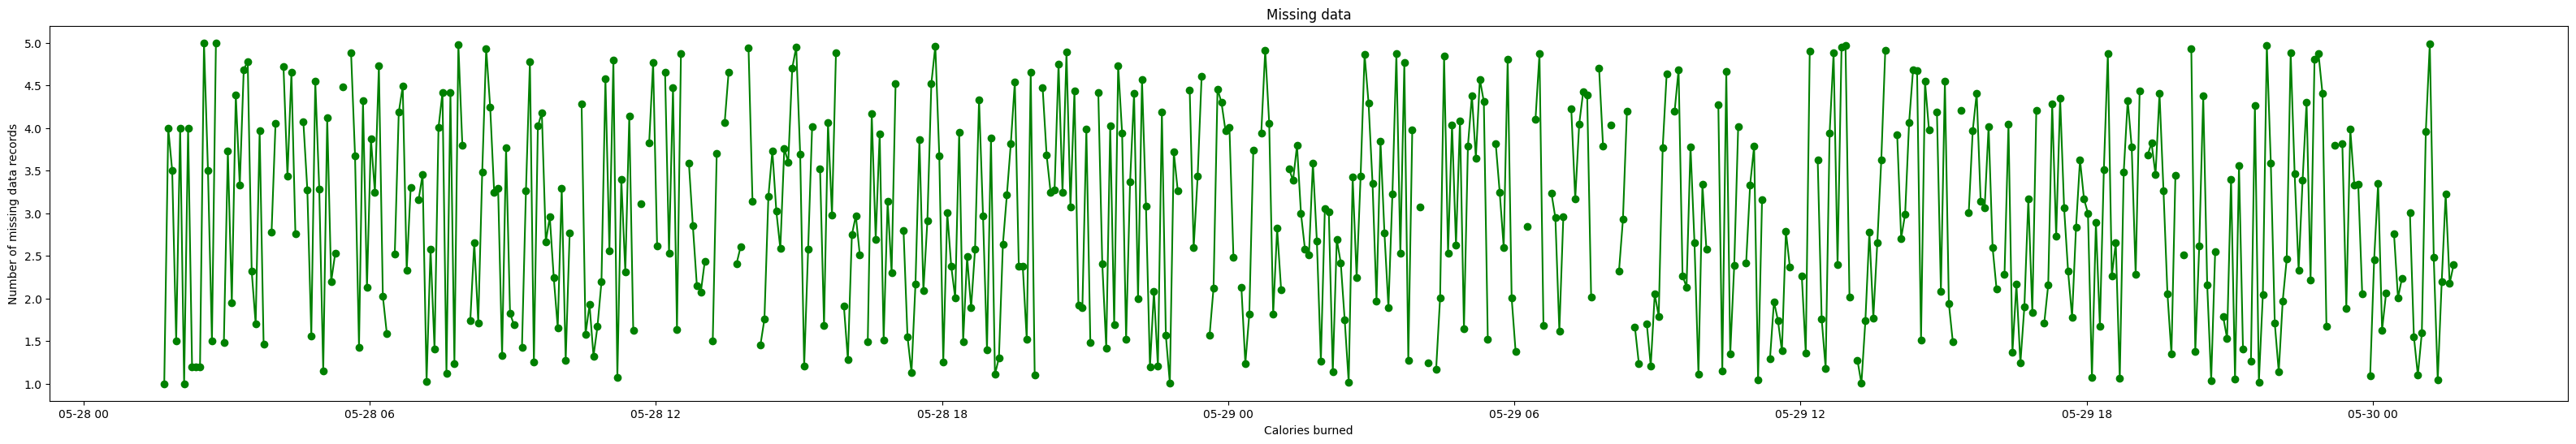

In [291]:
uriMongodb = os.getenv('uriMongodb')
client = pymongo.MongoClient(uriMongodb, tlsCAFile=ca)
db = client['calaid_android']
activityDataCollection = db['ActivityData']
dtMongoStart = datetime.strptime("2023-05-21 01:41:30.733000", '%Y-%m-%d %H:%M:%S.%f') + timedelta(days=7)
dtMongoEnd = dtMongoStart + timedelta(days=2)
listActivityData = list(activityDataCollection.find({ "userId": os.getenv('userId'), "startTimestamp":{"$gte": dtMongoStart, "$lte": dtMongoEnd} }))
df = pd.DataFrame(listActivityData)
df.sort_values(by='startTimestamp', inplace=True)
dfNullValues = df.loc[df.isnull().any(axis=1)]
# color = ['red' if val is None else 'blue' for val in df['caloriesBurned']]
df['activityType']=df['activityType'].fillna('Unknown')
# print(df)
dfNullValues['caloriesBurned'] = None
# print(df.loc[df.isnull().any(axis=1)])
plt.figure(figsize=(40, 6))
# plt.hist(df['caloriesBurned'])
# plt.hist(dfNullValues['caloriesBurned'], color='red')
plt.scatter(df['startTimestamp'], df['caloriesBurned'] , color='green', marker='o')
plt.plot(df['startTimestamp'], df['caloriesBurned'], color='green')
# plt.plot(dfNullValues['startTimestamp'], dfNullValues['activityType'], color='red', marker='o')
# plt.scatter(df['startTimestamp'], df['caloriesBurned'], color='green')
plt.scatter(dfNullValues['startTimestamp'], dfNullValues['caloriesBurned'], color='red')
plt.xlabel('Calories burned')
plt.ylabel('Number of missing data records')
plt.title('Missing data')
plt.show()

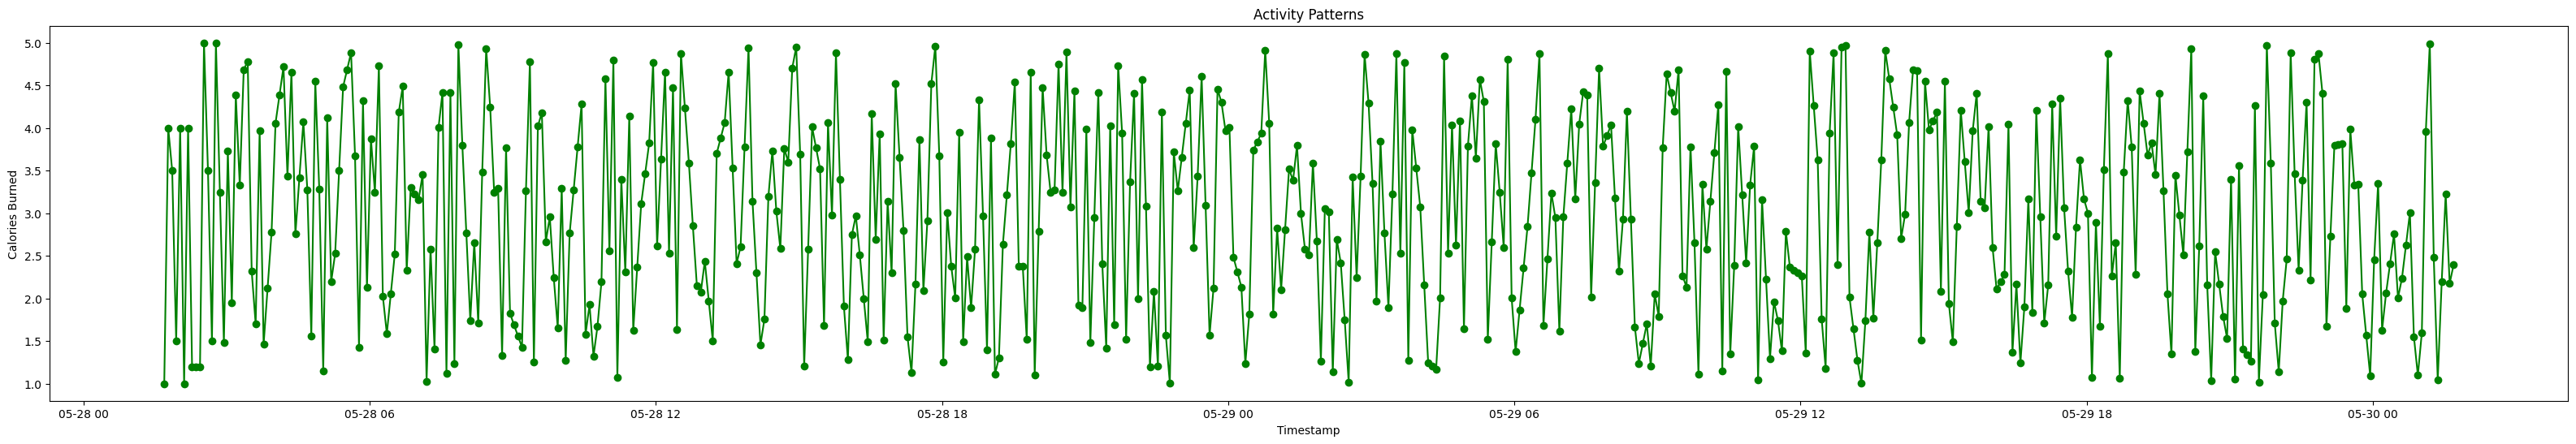

In [292]:
df['activityType'].interpolate(method='linear', inplace=True)
df['caloriesBurned'].interpolate(method='linear', inplace=True)

df.reset_index(inplace=True)

# print(df.loc[4025])

plt.figure(figsize=(40, 6))
# plt.plot(df['startTimestamp'], df['caloriesBurned'])
plt.plot(df['startTimestamp'],df['caloriesBurned']  , color='green', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Calories Burned')
plt.title('Activity Patterns')
plt.show()
